In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame(np.random.randn(5, 4), index=[chr(65 + i) for i in range(5)], columns=[chr(90 - i) for i in range(4)])

In [3]:
df

,Z,Y,X,W
A,-2.957104,-0.800439,0.592965,-1.208284
B,-0.560519,0.256779,-0.503466,-0.244370
C,0.697879,-0.685590,0.928627,0.784373
D,-0.850797,1.231328,-0.473023,0.422639
E,0.512162,0.153543,0.895315,0.650699


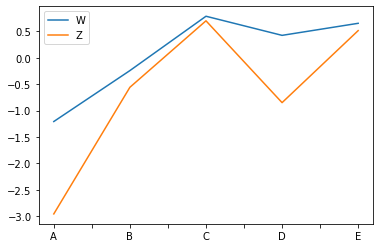

In [4]:
df[['W', 'Z']].plot()

In [5]:
df.iloc[:, 1:3]

,Y,X
A,-0.800439,0.592965
B,0.256779,-0.503466
C,-0.685590,0.928627
D,1.231328,-0.473023
E,0.153543,0.895315


In [6]:
df.drop('W', axis=1)

,Z,Y,X
A,-2.957104,-0.800439,0.592965
B,-0.560519,0.256779,-0.503466
C,0.697879,-0.685590,0.928627
D,-0.850797,1.231328,-0.473023
E,0.512162,0.153543,0.895315


In [7]:
df

,Z,Y,X,W
A,-2.957104,-0.800439,0.592965,-1.208284
B,-0.560519,0.256779,-0.503466,-0.244370
C,0.697879,-0.685590,0.928627,0.784373
D,-0.850797,1.231328,-0.473023,0.422639
E,0.512162,0.153543,0.895315,0.650699


In [8]:
df[df['W'] > 0]

,Z,Y,X,W
C,0.697879,-0.685590,0.928627,0.784373
D,-0.850797,1.231328,-0.473023,0.422639
E,0.512162,0.153543,0.895315,0.650699


In [9]:
df = pd.DataFrame({chr(65 + i): [np.random.randint(100) for _ in range(2000)] for i in range(5)})

In [10]:
df.head()

,A,B,C,D,E
0,87,5,41,76,13
1,3,40,44,39,63
2,99,82,86,84,9
3,9,96,74,58,61
4,44,86,62,27,20


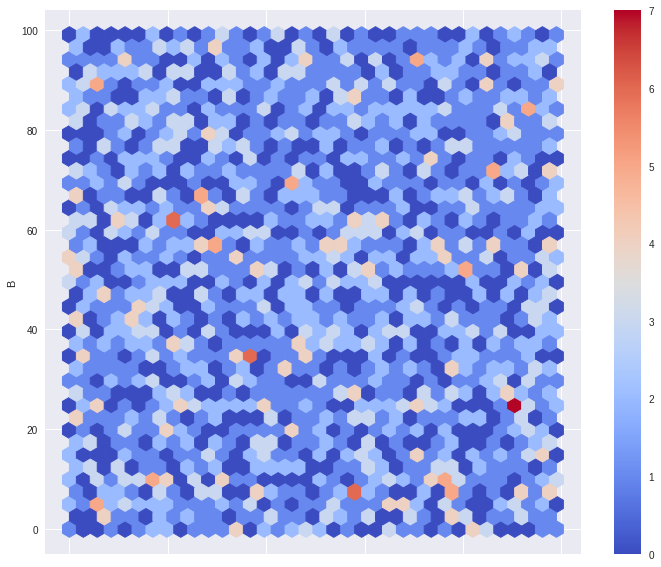

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.plot.hexbin(x='A', y='B', cmap='coolwarm', gridsize=35, figsize=(12, 10)) # , s=100, alpha=0.9, lw=2)

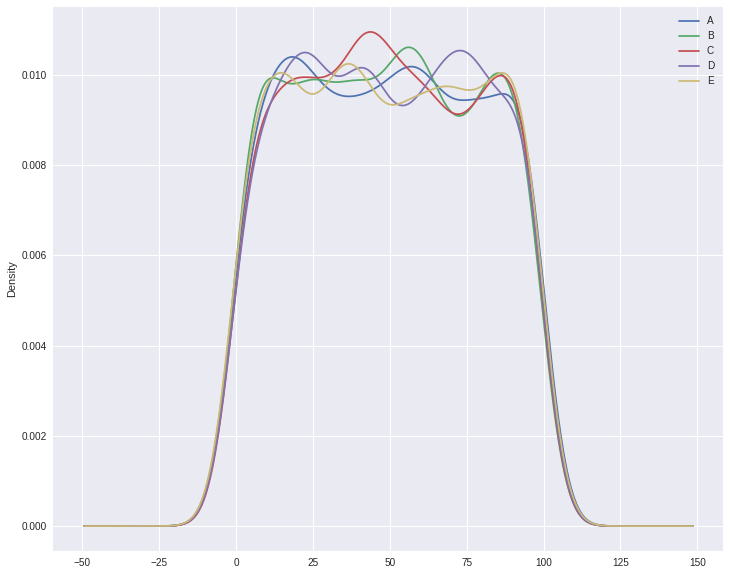

In [12]:
df.plot.kde(figsize=(12, 10))

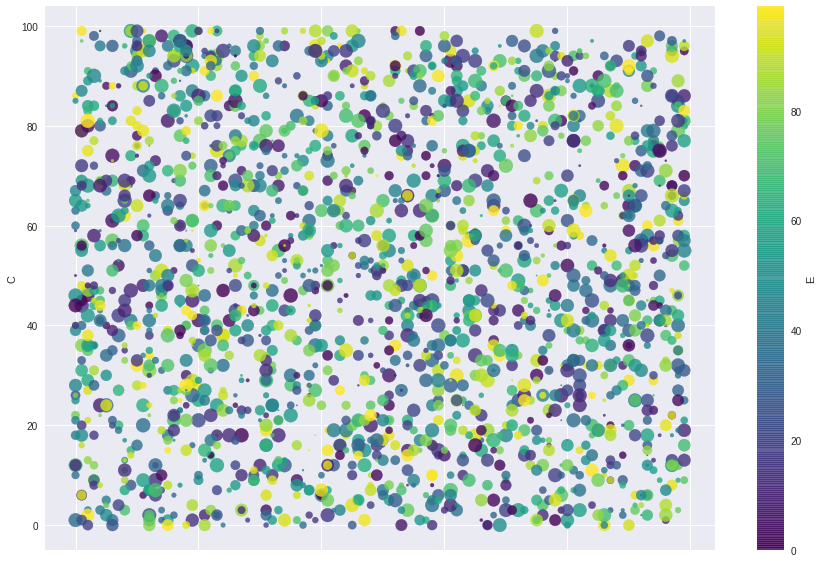

In [13]:
df.plot.scatter(x='A', y='C', c='E', s=df['D'] * 2, cmap='viridis', alpha=0.8, figsize=(15, 10))

In [14]:
from datetime import datetime

In [15]:
my_date_time = datetime(2020, 3, 12, 18, 37, 45)

In [23]:
walmart_df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)
walmart_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [26]:
walmart_df.shape

(1258, 6)

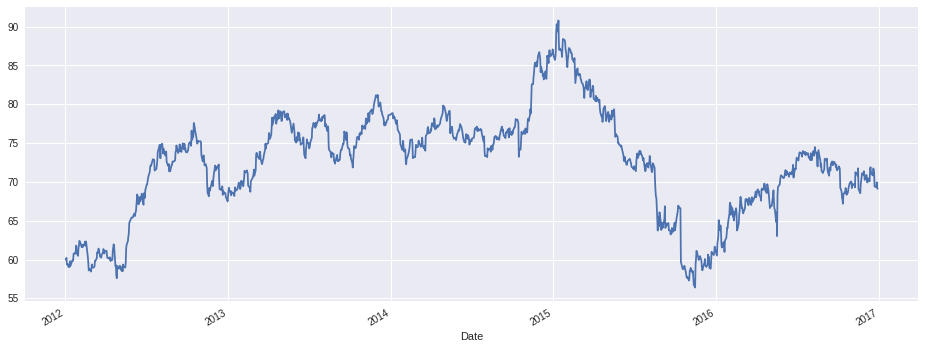

In [27]:
walmart_df['Open'].plot(figsize=(16, 6))

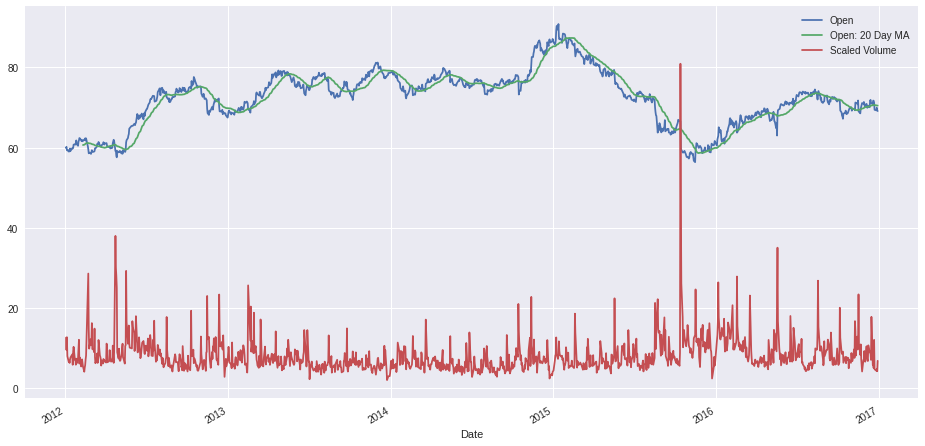

In [58]:
walmart_df['Open'].plot()
walmart_df['Open'].rolling(window=28).mean().plot(label='Open: 20 Day MA', figsize=(16, 8))
walmart_df['Scaled Volume'] = walmart_df['Volume'] / 1e6
walmart_df['Scaled Volume'].plot()
plt.legend()

In [47]:
walmart_df.index[walmart_df['Volume'].argmax()]

Timestamp('2015-10-14 00:00:00')

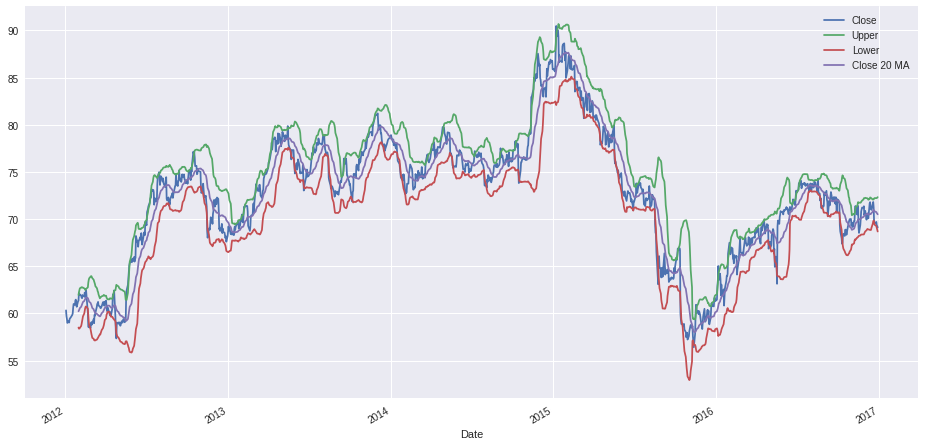

In [42]:
# Bollinger Plot 

# Close 20 days Moving Average
walmart_df['Close 20 MA'] = walmart_df['Close'].rolling(window=20).mean()

# upper 
walmart_df['Upper'] = walmart_df['Close 20 MA'] + 2 * (walmart_df['Close'].rolling(20).std())

# lower
walmart_df['Lower'] = walmart_df['Close 20 MA'] - 2 * (walmart_df['Close'].rolling(20).std())

# close
walmart_df[['Close', 'Upper', 'Lower', 'Close 20 MA']].plot(figsize=(16, 8))

In [62]:
import pandas_datareader
import pandas_datareader.data as web
from datetime import datetime

In [83]:
start_time = datetime(2015, 1, 1)
end_time = datetime(2020, 1, 1)

In [84]:
tesla_df = web.DataReader('TSLA', 'yahoo', start=start_time, end=end_time)
tesla_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500,42.124001


In [85]:
ford_df = web.DataReader('F', 'yahoo', start=start_time, end=end_time)
ford_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,15.65,15.18,15.59,15.36,24777900.0,11.675119
2015-01-05,15.13,14.69,15.12,14.76,44079700.0,11.219061
2015-01-06,14.90,14.38,14.88,14.62,32981600.0,11.112647
2015-01-07,15.09,14.77,14.78,15.04,26065300.0,11.431887
2015-01-08,15.48,15.23,15.40,15.42,33943400.0,11.720727


In [86]:
gm_df = web.DataReader('GM', 'yahoo', start=start_time, end=end_time)
gm_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,35.310001,34.410000,35.270000,34.840000,9756700.0,27.594938
2015-01-05,35.250000,34.070000,34.980000,34.330002,16223000.0,27.190994
2015-01-06,35.220001,34.099998,34.410000,34.849998,17747600.0,27.602859
2015-01-07,35.950001,35.040001,35.230000,35.840000,19319200.0,28.386992
2015-01-08,36.450001,35.799999,36.060001,36.200001,15206600.0,28.672125


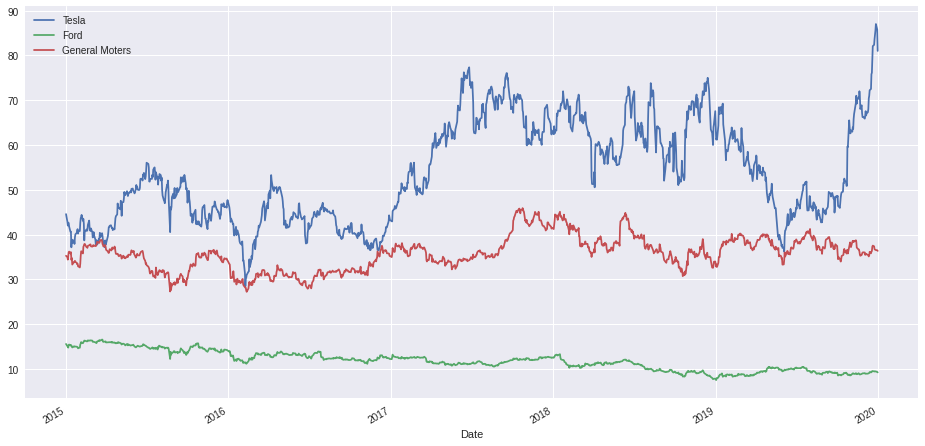

In [87]:
tesla_df['Open'].plot(label='Tesla', figsize=(16, 8))
ford_df['Open'].plot(label='Ford')
gm_df['Open'].plot(label='General Moters')
plt.legend();

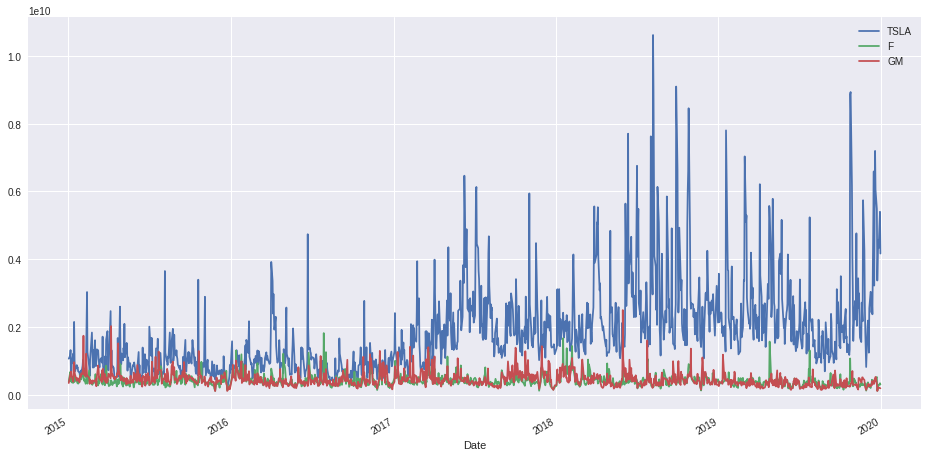

In [88]:
(tesla_df['Open'] * tesla_df['Volume']).plot(label='TSLA', figsize=(16, 8))
(ford_df['Open'] * ford_df['Volume']).plot(label='F', figsize=(16, 8))
(gm_df['Open'] * gm_df['Volume']).plot(label='GM', figsize=(16, 8))
plt.legend()

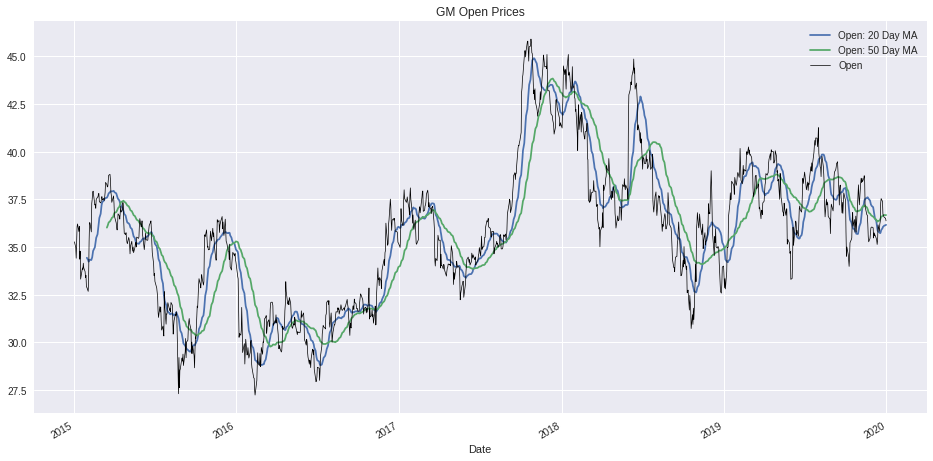

In [94]:
gm_df['Open'].rolling(20).mean().plot(label='Open: 20 Day MA', figsize=(16, 8))
gm_df['Open'].rolling(50).mean().plot(label='Open: 50 Day MA', figsize=(16, 8))
gm_df['Open'].plot(label='Open', figsize=(16, 8), c='k', lw=0.7)
plt.title('GM Open Prices')
plt.legend();

In [95]:
from pandas.plotting import scatter_matrix

In [98]:
car_comp = pd.concat([tesla_df['Open'], ford_df['Open'], gm_df['Open']], axis=1)
car_comp.columns = ['TSLA Open', 'F Open', 'GM Open']
car_comp.head()

,TSLA Open,F Open,GM Open
Date,,,
2015-01-02,44.574001,15.59,35.270000
2015-01-05,42.910000,15.12,34.980000
2015-01-06,42.012001,14.88,34.410000
2015-01-07,42.669998,14.78,35.230000
2015-01-08,42.562000,15.40,36.060001


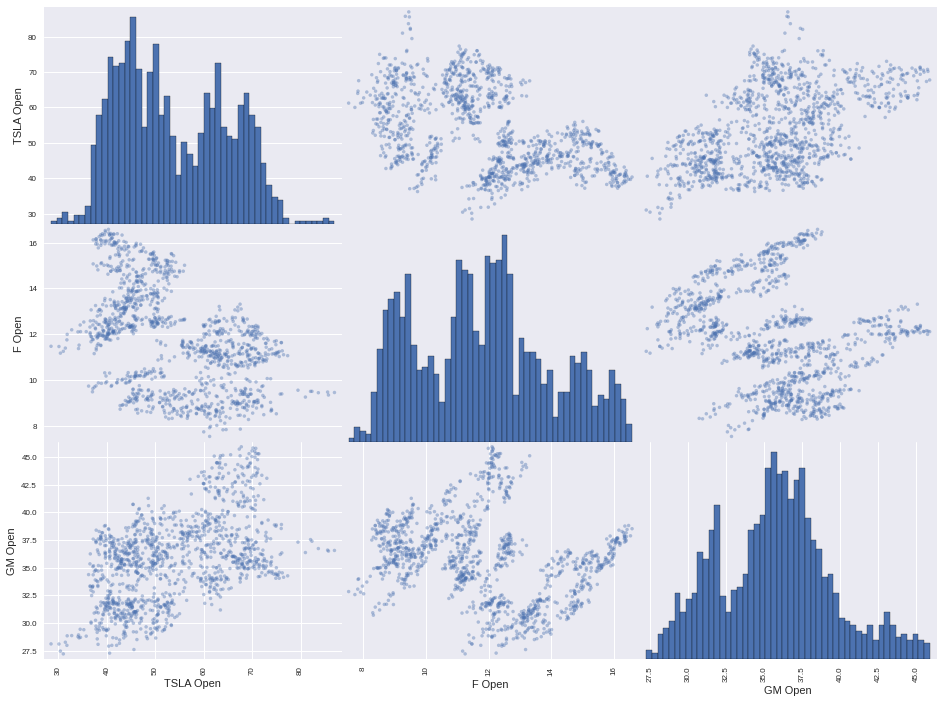

In [107]:
scatter_matrix(frame=car_comp, alpha=0.4, figsize=(16, 12), hist_kwds={'bins': 50, 'edgecolor': 'k'});

In [122]:
# candlestick plots
import mplfinance as mpf
from matplotlib.dates import date2num, DateFormatter, MONDAY, DayLocator, WeekdayLocator
tesla_reset = tesla_df.loc['2015-1'].reset_index()
tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000,43.862000
1,2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500,42.018002
2,2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500,42.256001
3,2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000,42.189999
4,2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500,42.124001


In [129]:
tesla_reset['Date_ax'] = tesla_reset['Date'].apply(lambda date: date2num(date))
tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Date_ax
0,2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000,43.862000,735600.0
1,2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500,42.018002,735603.0
2,2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500,42.256001,735604.0
3,2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000,42.189999,735605.0
4,2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500,42.124001,735606.0


In [132]:
cols = ['Date_ax', 'Open', 'High', 'Low', 'Close']
tesla_vals = [tuple(vals) for vals in tesla_reset[cols].values]

20

In [136]:
for t in tesla_vals:
  print(t)

(735600.0, 44.57400131225586, 44.650001525878906, 42.652000427246094, 43.86199951171875)
(735603.0, 42.90999984741211, 43.29999923706055, 41.43199920654297, 42.018001556396484)
(735604.0, 42.012001037597656, 42.84000015258789, 40.84199905395508, 42.25600051879883)
(735605.0, 42.66999816894531, 42.95600128173828, 41.95600128173828, 42.189998626708984)
(735606.0, 42.5620002746582, 42.7599983215332, 42.00199890136719, 42.124000549316406)
(735607.0, 41.784000396728516, 41.99599838256836, 40.992000579833984, 41.332000732421875)
(735610.0, 40.61000061035156, 40.89400100708008, 39.849998474121094, 40.44200134277344)
(735611.0, 40.66400146484375, 41.52199935913086, 40.18199920654297, 40.849998474121094)
(735612.0, 37.16600036621094, 39.040000915527344, 37.0, 38.53799819946289)
(735613.0, 38.89799880981445, 39.150001525878906, 38.0, 38.374000549316406)
(735614.0, 38.13999938964844, 38.89799880981445, 37.93000030517578, 38.61399841308594)
(735618.0, 38.77399826049805, 38.82400131225586, 37.40800

In [138]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dateFormatter = DateFormatter('%d')

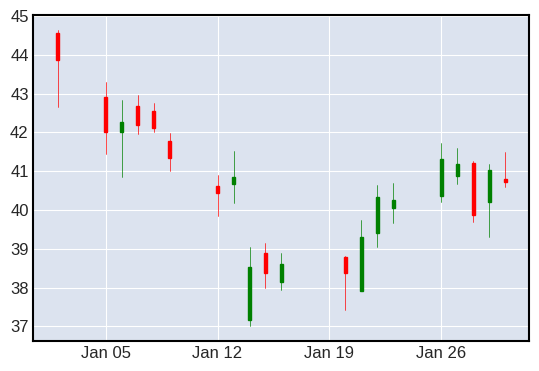

In [145]:
from mplfinance.original_flavor import candlestick_ohlc
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, tesla_vals, width=0.2, colorup='g', colordown='r');

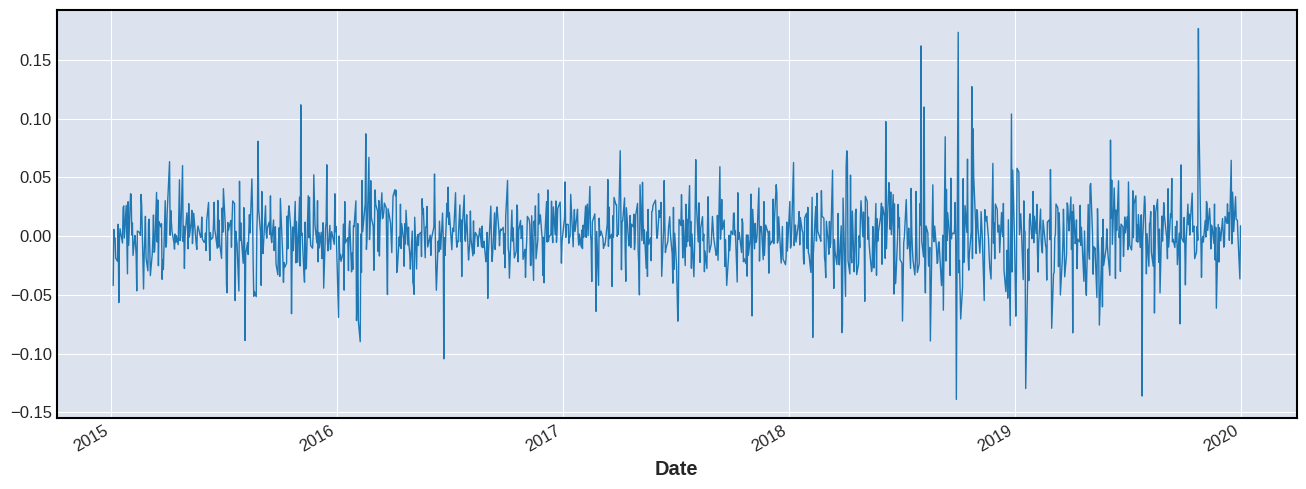

In [152]:
# Get returns 
tesla_df['returns'] = (tesla_df['Close'] / tesla_df['Close'].shift(1)) - 1
tesla_df['returns'].plot(lw=1, figsize=(16, 6))

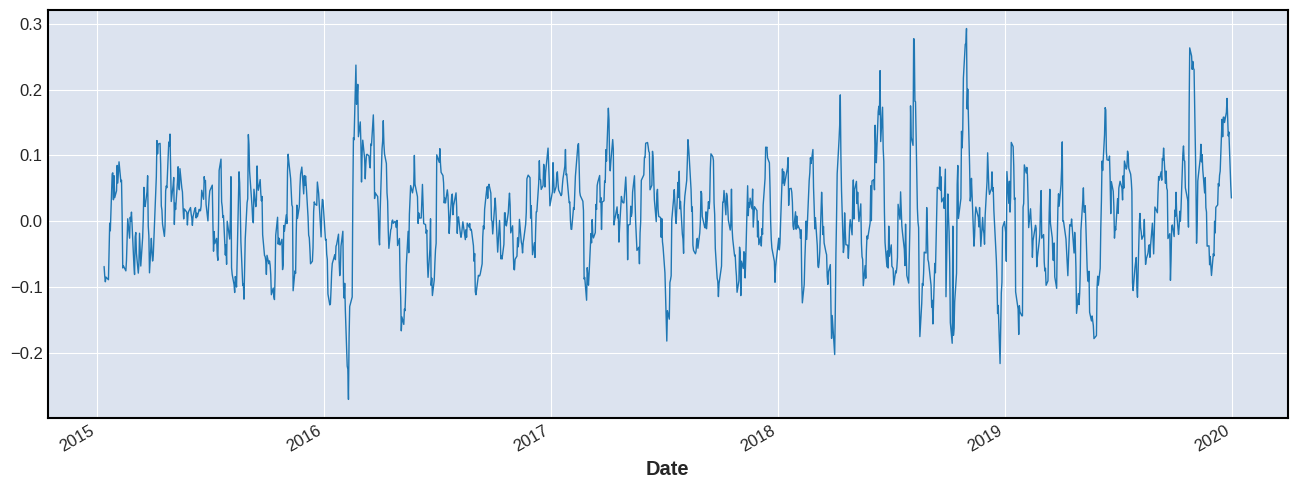

In [155]:
tesla_df['returns'] = tesla_df['Close'].pct_change(periods=7)
tesla_df['returns'].plot(figsize=(16, 6), lw=1)

In [156]:
tesla_df['returns'] = tesla_df['Close'].pct_change(periods=1)
ford_df['returns'] = ford_df['Close'].pct_change(periods=1)
gm_df['returns'] = gm_df['Close'].pct_change(periods=1)

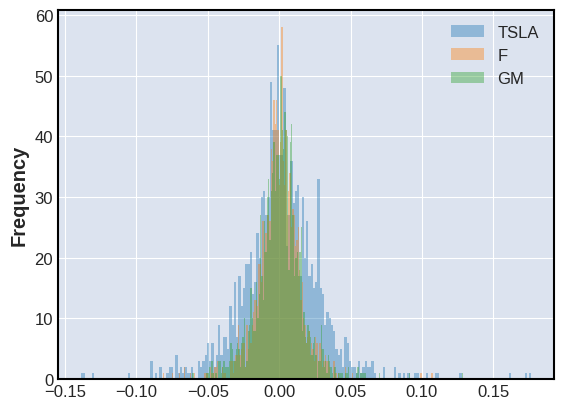

In [161]:
tesla_df['returns'].plot.hist(label='TSLA', bins=200, alpha=0.4)
ford_df['returns'].plot.hist(label='F', bins=200, alpha=0.4)
gm_df['returns'].plot.hist(label='GM', bins=200, alpha=0.4)
plt.legend()

In [163]:
import numpy as np

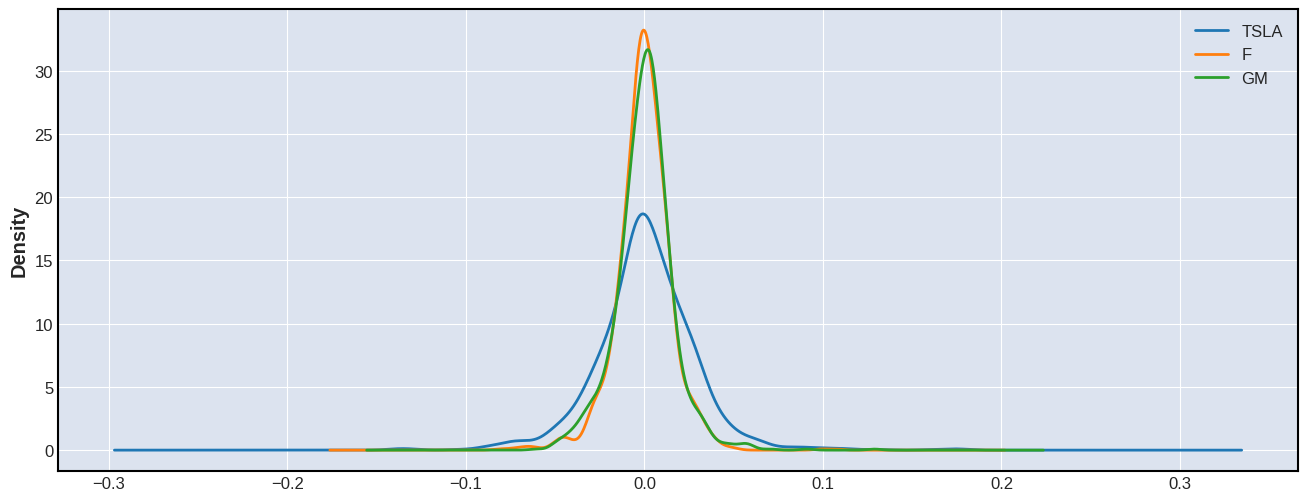

In [166]:
tesla_df['returns'].plot.kde(label='TSLA')
ford_df['returns'].plot.kde(label='F')
gm_df['returns'].plot.kde(label='GM', figsize=(16, 6))
plt.legend()

In [169]:
box_df = pd.concat([tesla_df['returns'], ford_df['returns'], gm_df['returns']], axis=1)
box_df.columns = ['TSLA Returns', 'F Returns', 'GM Returns']
box_df.head()

,TSLA Returns,F Returns,GM Returns
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.042041,-0.039062,-0.014638
2015-01-06,0.005664,-0.009485,0.015147
2015-01-07,-0.001562,0.028728,0.028408
2015-01-08,-0.001564,0.025266,0.010045


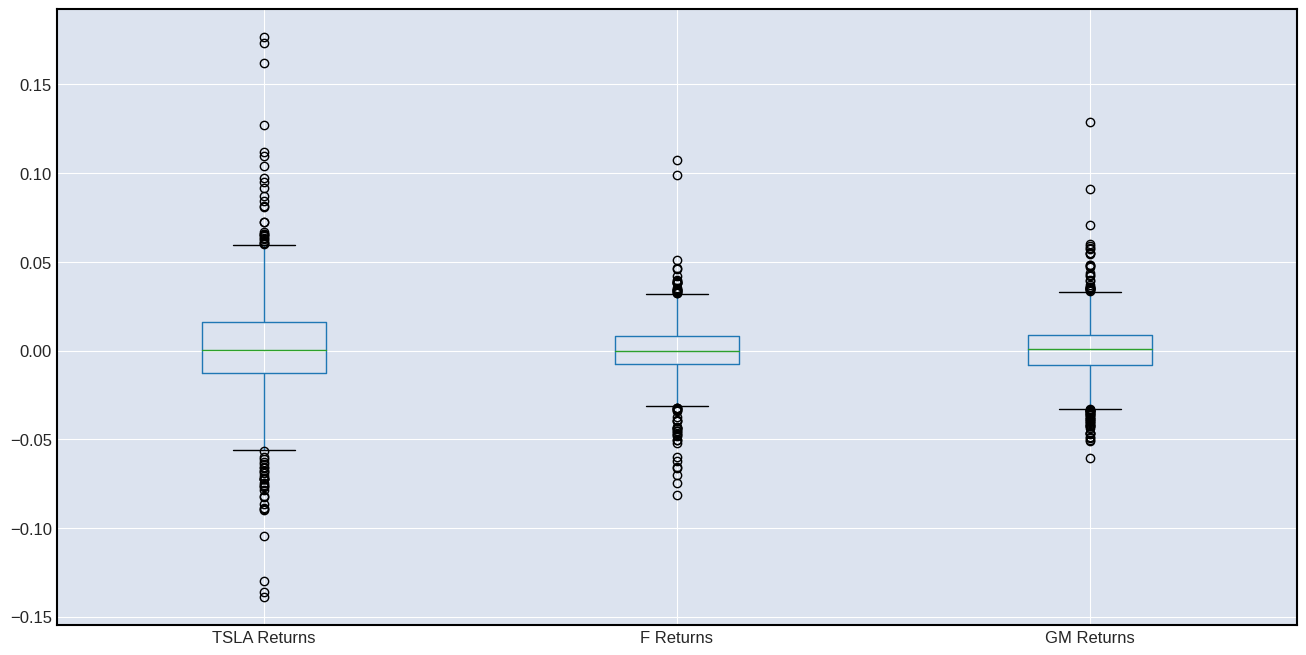

In [170]:
box_df.plot(kind='box', figsize=(16, 8))

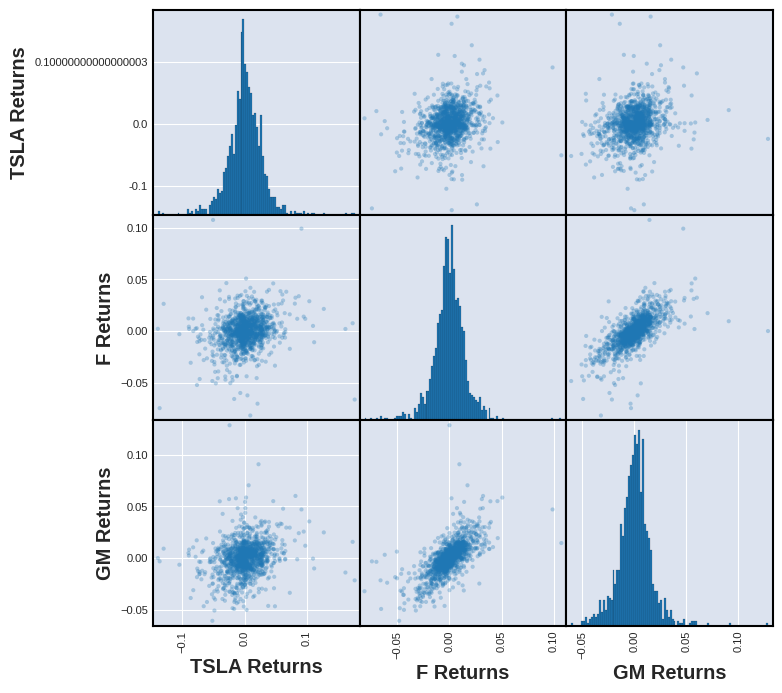

In [175]:
scatter_matrix(box_df, figsize=(8, 8), alpha=0.3, hist_kwds={"bins": 100, 'edgecolor': 'k', 'linewidth': 0.1});

In [180]:
tesla_df['Cumulative Returns'] = (1 + tesla_df['returns']).cumprod()
ford_df['Cumulative Returns'] = (1 + ford_df['returns']).cumprod()
gm_df['Cumulative Returns'] = (1 + gm_df['returns']).cumprod()

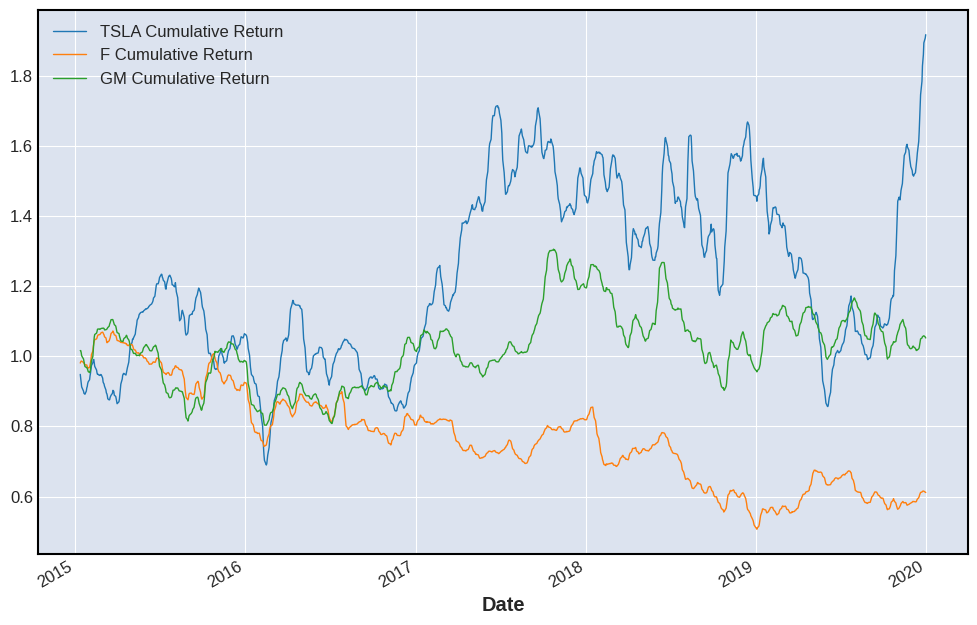

In [186]:
tesla_df['Cumulative Returns'].rolling(7).mean().plot(label='TSLA Cumulative Return', lw=1)
ford_df['Cumulative Returns'].rolling(7).mean().plot(label='F Cumulative Return', lw=1)
gm_df['Cumulative Returns'].rolling(7).mean().plot(label='GM Cumulative Return', figsize=(12, 8), lw=1)
plt.legend();